In [3]:
import numpy as np     
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploratory data analysis

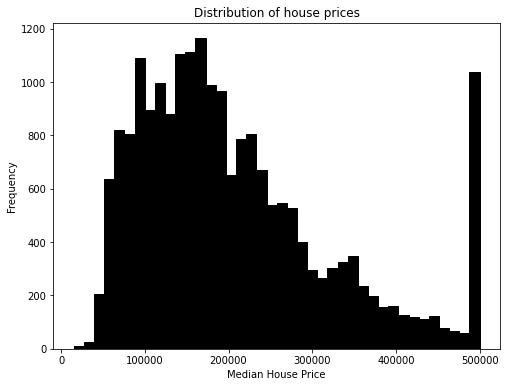

In [5]:
plt.figure(figsize=(8, 6))

sns.histplot(df.median_house_value, bins=40, color="black", alpha=1)
plt.ylabel("Frequency")
plt.xlabel("Median House Price")
plt.title("Distribution of house prices")

plt.show()

The median house prices shows a long tail distribution. Therefore, it has to be log transformed.

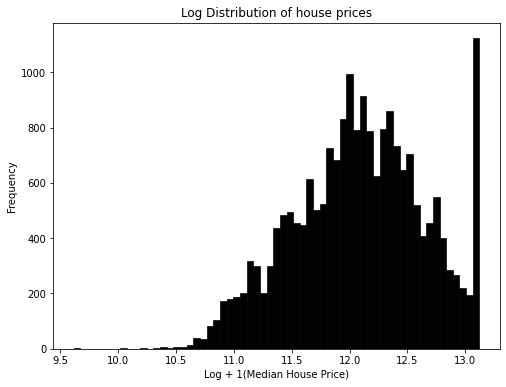

In [7]:
log_price = np.log1p(df.median_house_value)

plt.figure(figsize=(8, 6))

sns.histplot(log_price, color="black", alpha=1)
plt.ylabel("Frequency")
plt.xlabel("Log + 1(Median House Price)")
plt.title("Log Distribution of house prices")

plt.show()

The log transformed prices looks a little more gaussian. 

# features 

In [8]:
columns = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
df = df[columns]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Question 1

In [9]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2

In [10]:
df.population.median()

1166.0

# split the data

In [15]:
# extract the target and apply log transformation to it
y = df['median_house_value']
y = np.log1p(y)
# delete the target from the dataframe
del df['median_house_value']



(20640, 8)

In [19]:
# train validation test split of data
np.random.seed(42)

n = len(df)

# specifying the number of validation, test, and train datasets
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# shuffling the dataset
idx = np.arange(n)
np.random.shuffle(idx) 
df_shuffled = df.iloc[idx]

# split the dataset for the features
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# split the dataset for the target
y_train = y.iloc[:n_train].values 
y_val = y.iloc[n_train:n_train+n_val].values 
y_test = y.iloc[n_train+n_val:].values 






# Question 3

In [23]:
df_test.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [24]:
df_val.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [25]:
df_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

Only the train dataset has missing values. Test and validation datasets do not. 

Computing a baseline model while filling the nulls with 0 or the mean. 

## the linear regression model

In [26]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## preparing the datasets

In [27]:
def prepare_X(df, fill):
    df_num = df.fillna(fill)
    X = df_num.values
    return X

## rmse function

In [28]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    score = np.sqrt(mse)
    return round(score, 2)

## doing the baseline model for filling with 0 and the mean

In [32]:
col_mean = df_train.total_bedrooms.mean()
X_val = df_val.values

for filler in [0, col_mean]:
    # fit the model
    X_train = prepare_X(df_train, filler)
    w_0, w = train_linear_regression(X_train, y_train)
    

    # predict on the validation set
    y_pred = w_0 + X_val.dot(w)
    print(f'The rmse score for {filler} is {rmse(y_val, y_pred)}')
    
     
    



The rmse score for 0 is 0.56
The rmse score for 533.4803317730147 is 0.56


We can see that both are equally good

# Question 4

In [34]:
def prepare_X2(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [36]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [42]:
X_train = prepare_X2(df_train)
X_val = df_val.values 
result = pd.DataFrame()

# iterate through the regularization values
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    col = str(r)
    result[col] = [score]


In [43]:
result

,0,1e-06,0.0001,0.001,0.01,0.1,1,5,10
0,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.57,0.57


# Question 5

In [44]:
def train_linear_regression_q5(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [45]:
def prepare_X_q5(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [46]:
def rmse_q5(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    score = np.sqrt(mse)
    return score

## trying different seed values

In [49]:
# collect all the rmse scores
results_q5 = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # train validation test split of data
    np.random.seed(seed)

    n = len(df)

    # specifying the number of validation, test, and train datasets
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    # shuffling the dataset
    idx = np.arange(n)
    np.random.shuffle(idx) 
    df_shuffled = df.iloc[idx]

    # split the dataset for the features
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    # split the dataset for the target
    y_train = y.iloc[:n_train].values 
    y_val = y.iloc[n_train:n_train+n_val].values 
    y_test = y.iloc[n_train+n_val:].values 

    # prepare the datasets by filling missing values
    X_train = prepare_X_q5(df_train)
    X_val = prepare_X_q5(df_val)
    X_test = prepare_X_q5(df_test)

    # train the model without regularization
    w_0, w = train_linear_regression_q5(X_train, y_train)
    # make predictions on the validation data set
    y_pred = w_0 + X_val.dot(w)
    # collect the rmse score
    score = rmse_q5(y_val, y_pred)
    results_q5.append(score)



In [56]:
std_dev = np.std(results_q5)
std_dev

0.0003404122209445269

# Question 6

## combining train and validation datasets

In [60]:
df2 = pd.read_csv("housing.csv")
columns = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
df2 = df2[columns]
df2.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [63]:
# train validation test split of data
np.random.seed(9)

n = len(df2)

# specifying the number of validation, test, and train datasets
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# shuffling the dataset
idx = np.arange(n)
np.random.shuffle(idx) 
df_shuffled = df2.iloc[idx]

# split the dataset for the features
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


In [ ]:
# combine train and validation datasets
df_full = pd.concat([df_train, df_val])



In [66]:
# get the targets and do log transformation
y_full = df_full['median_house_value'].values 
y_train = np.log1p(y_full)

y_test = np.log1p(df_test['median_house_value'].values)


In [70]:
del df_full['median_house_value']
del df_test['median_house_value']

In [73]:
def prepare_X_q6(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [74]:
def train_linear_regression_reg6(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [75]:
def rmse_q6(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    score = np.sqrt(mse)
    return score

In [77]:
# prepare the train data set and fit it
X_train = prepare_X_q6(df_full)
w_0, w = train_linear_regression_reg6(X_train, y_train, 0.001)

# predict on the test dataset
X_test = prepare_X_q6(df_test)
y_pred = w_0 + X_test.dot(w)
score = rmse_q6(y_test, y_pred)
score

0.34531689143641986